In [1]:
import seaborn as sns

In [2]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
sns.set

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(10)

NameError: name 'pd' is not defined

In [7]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
diabetes_df.isnull().head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [12]:
diabetes_df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
diabetes_df_copy = diabetes_df.copy(deep = True)


In [14]:
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [15]:
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


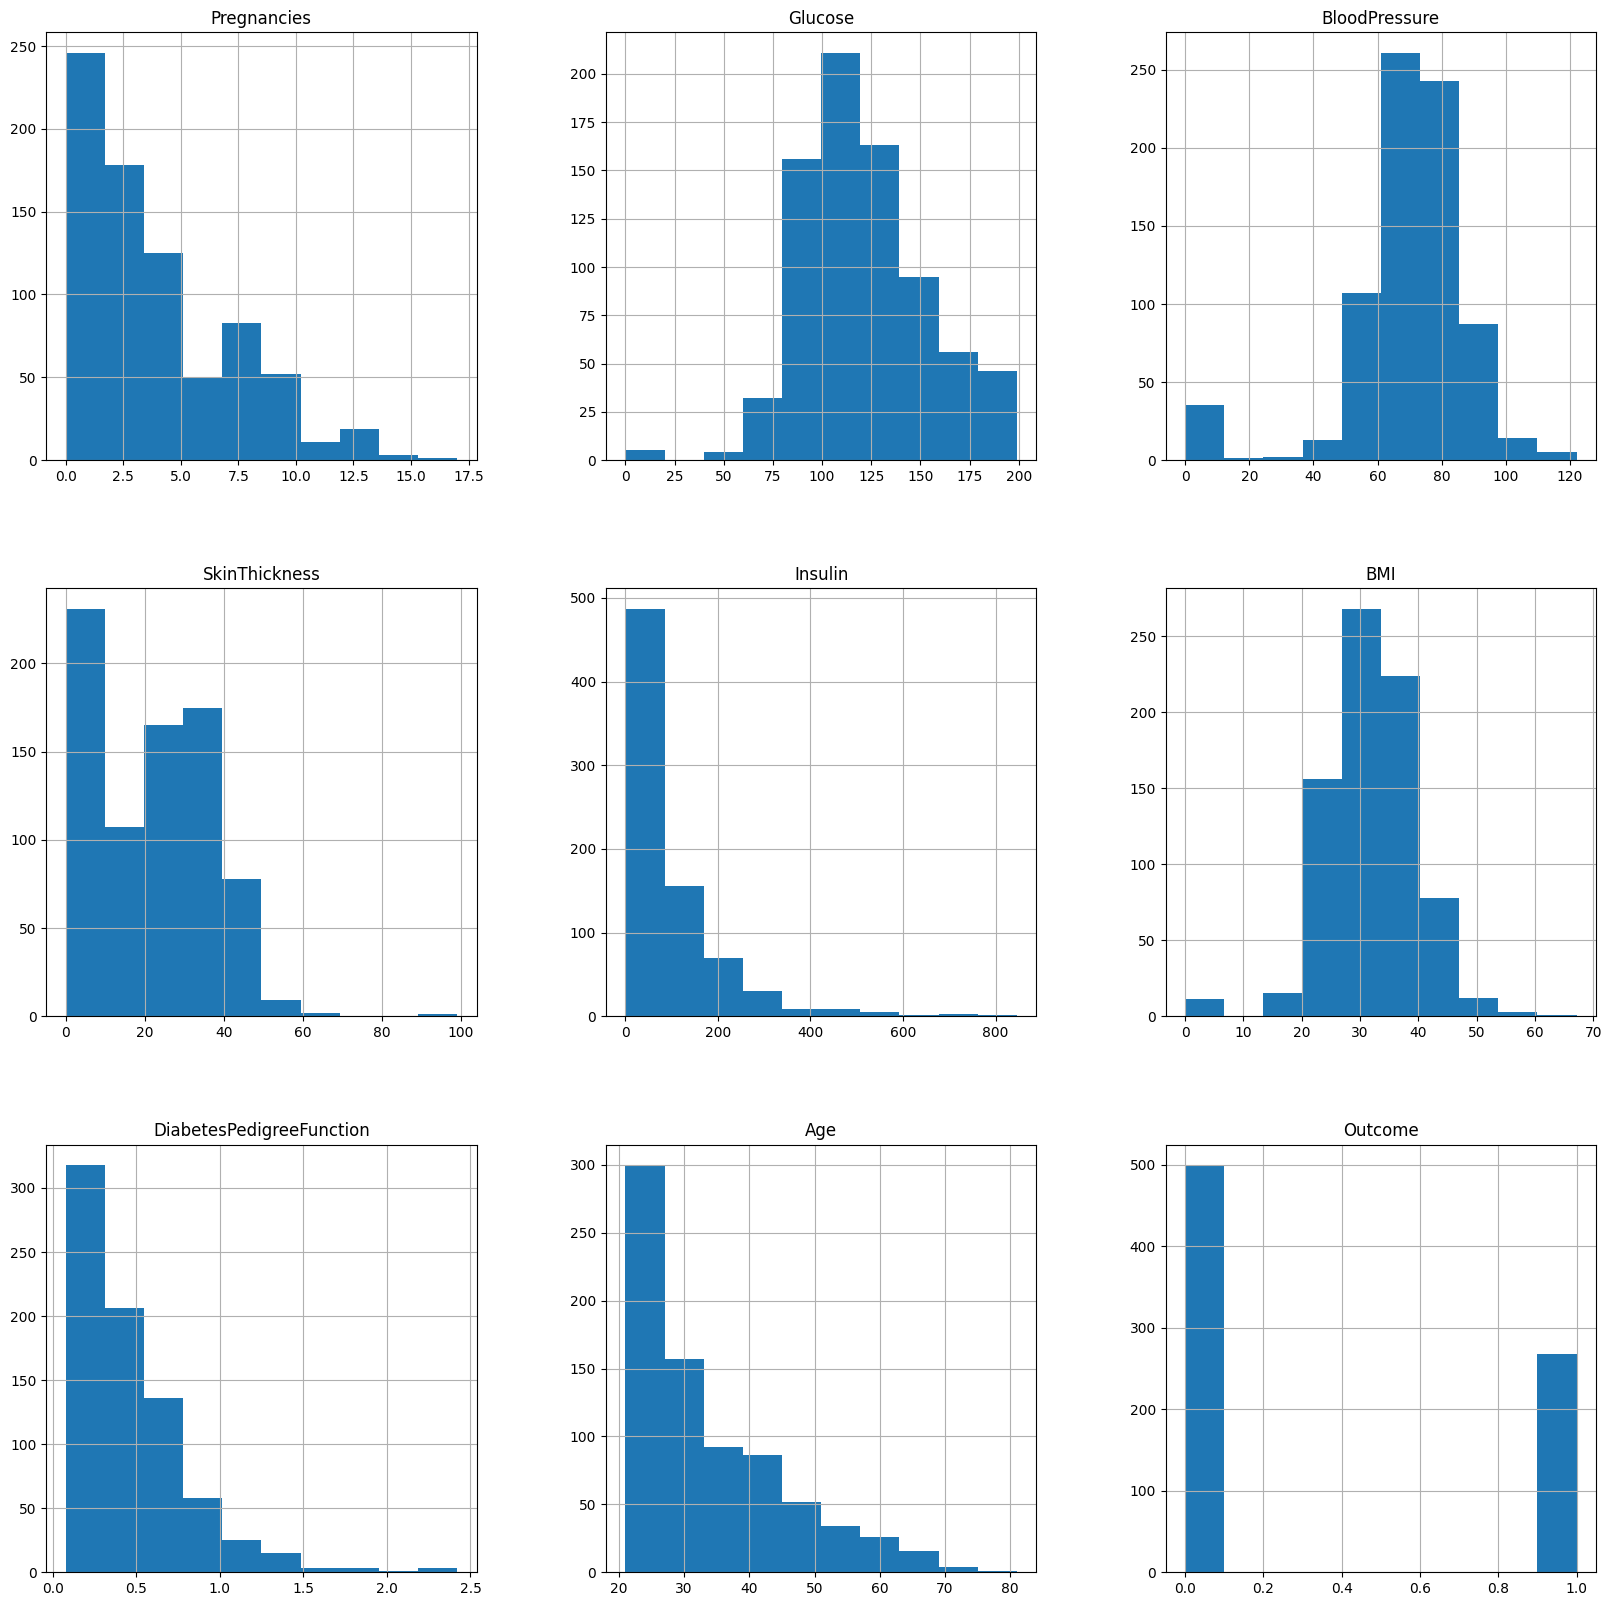

In [16]:
p = diabetes_df.hist(figsize = (20,20))


In [17]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

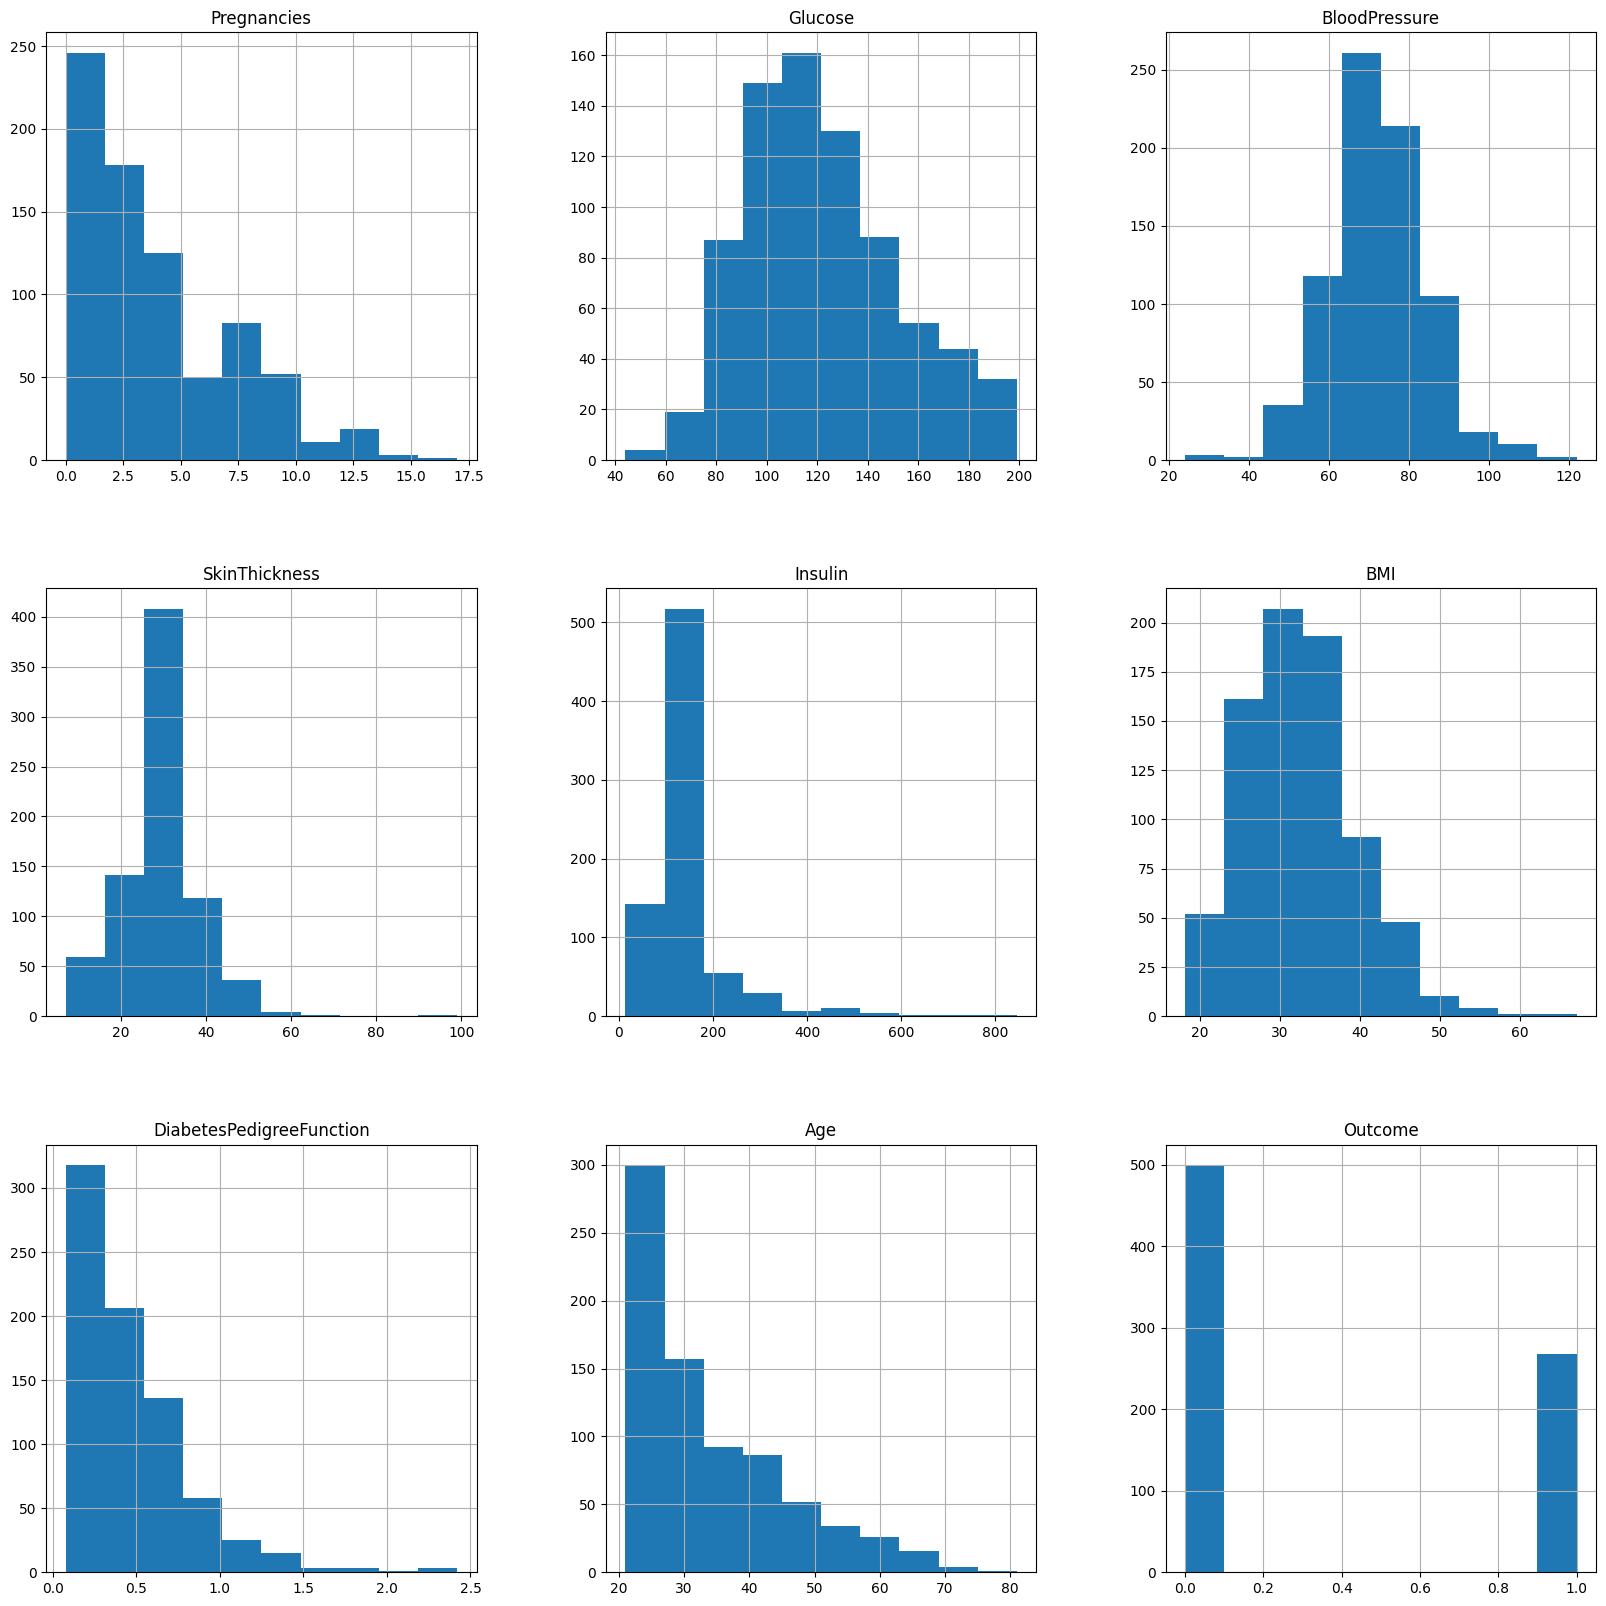

In [18]:
p = diabetes_df_copy.hist(figsize = (20,20))


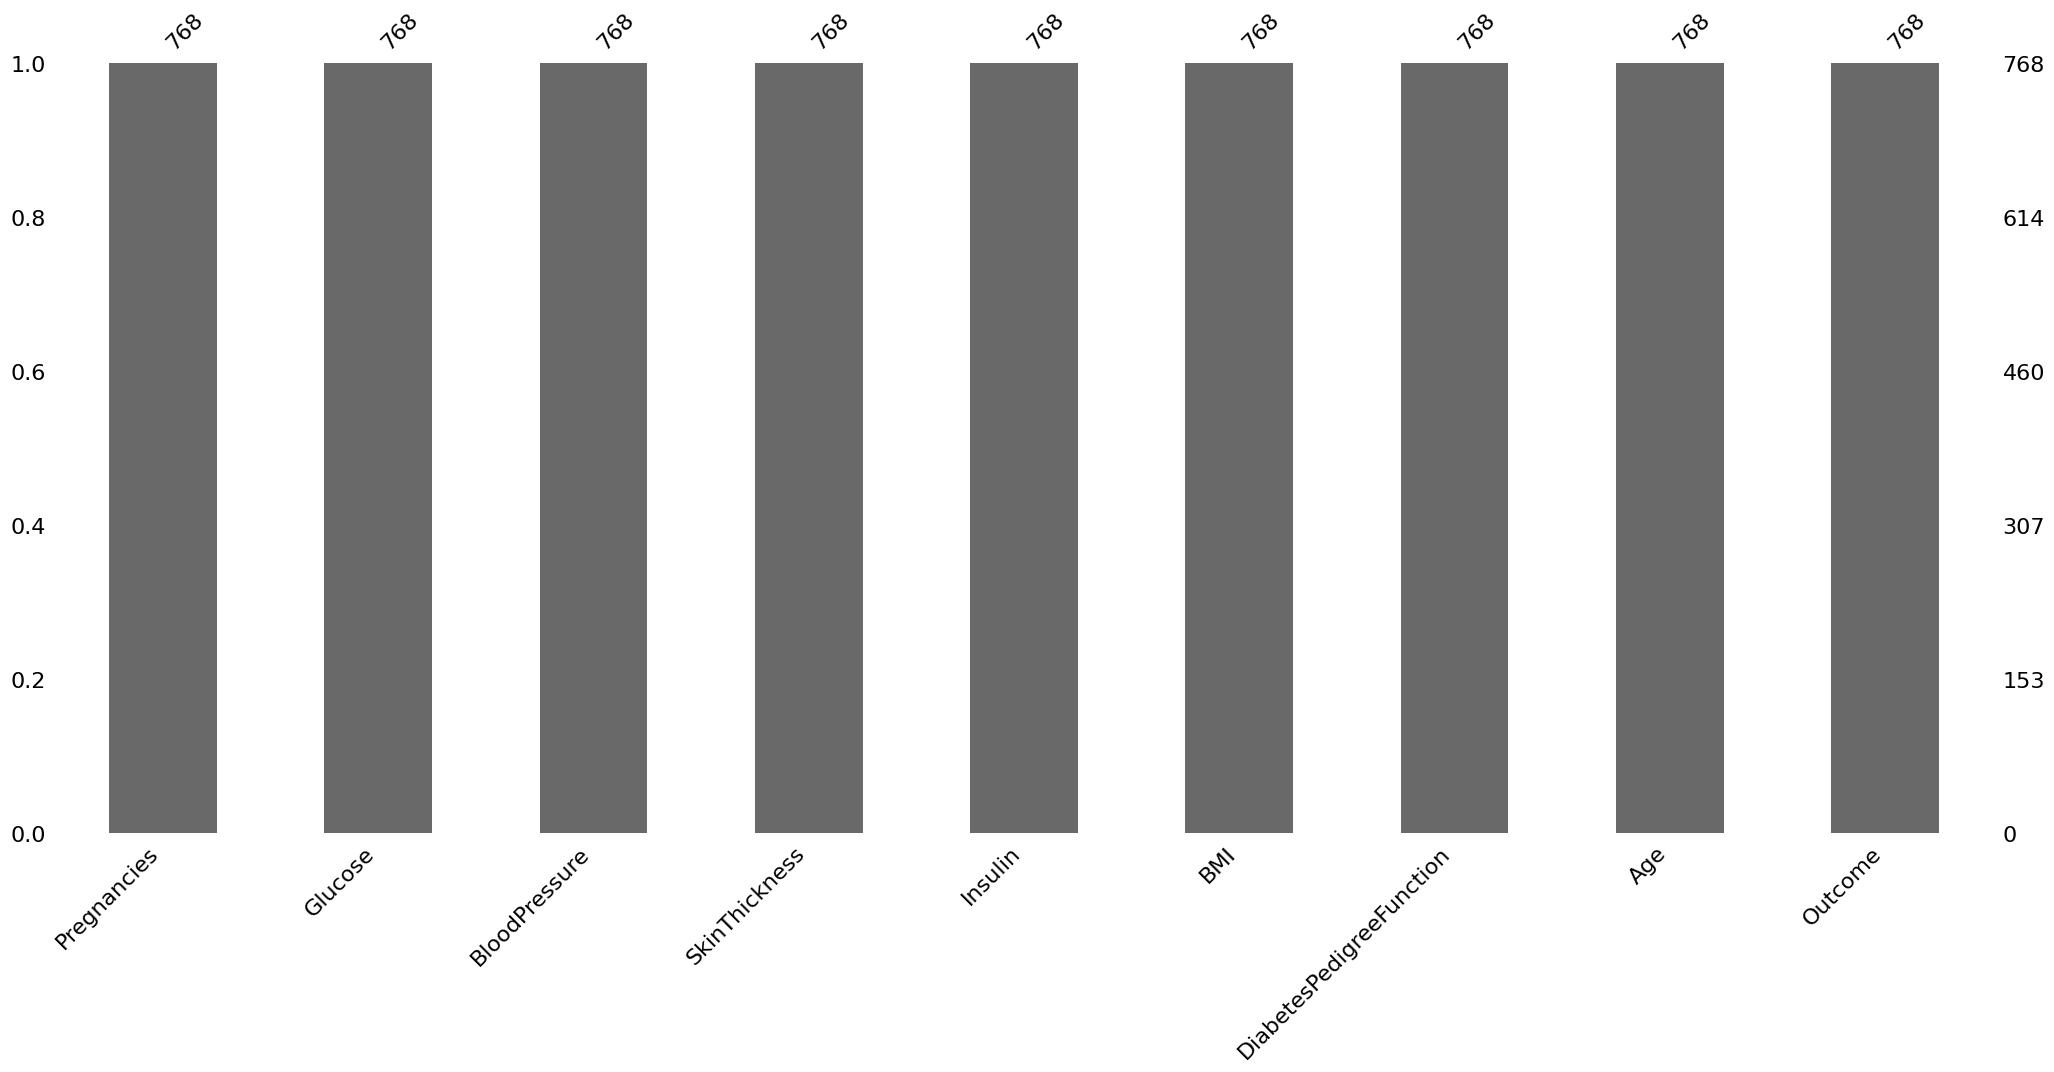

In [19]:
p = msno.bar(diabetes_df)


Outcome
0    500
1    268
Name: count, dtype: int64


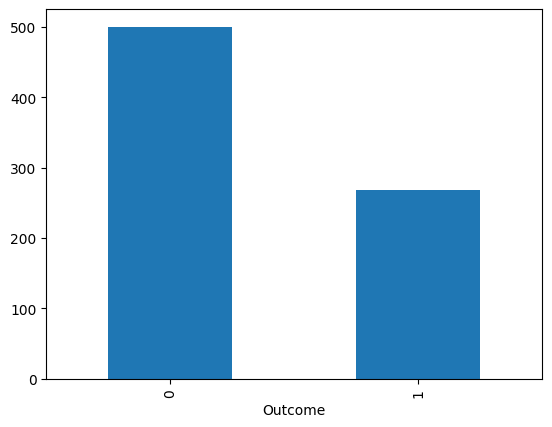

In [20]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

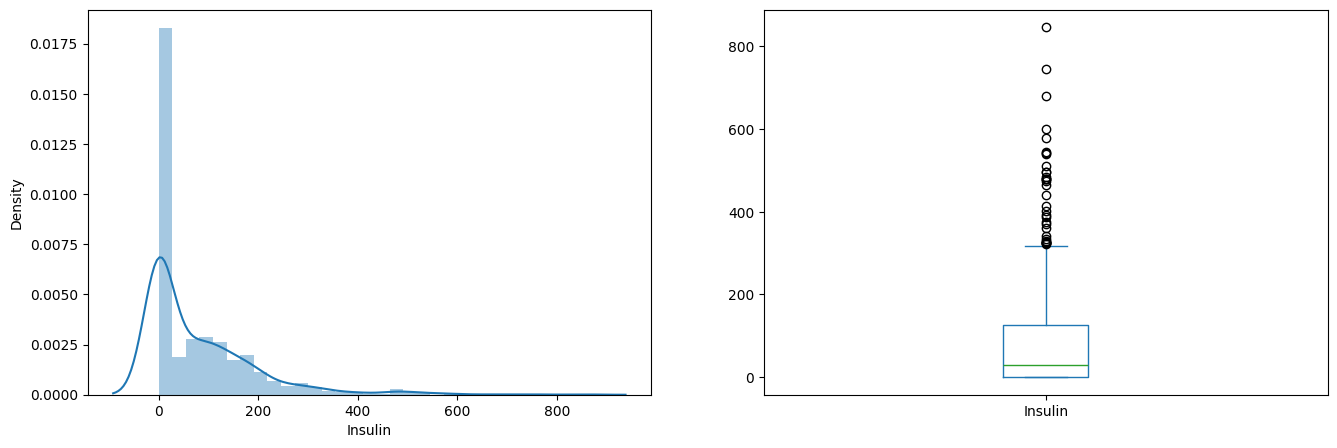

In [21]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

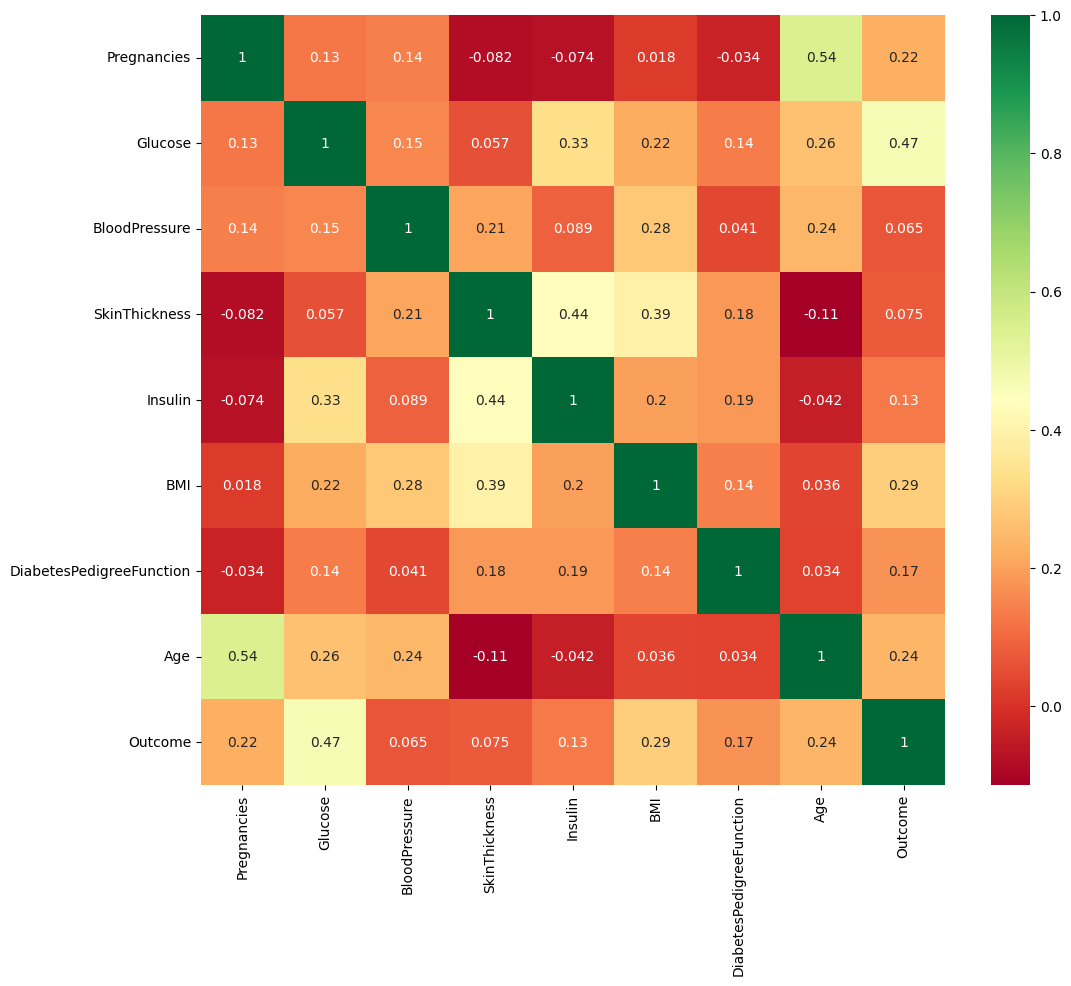

In [22]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

In [23]:
diabetes_df_copy.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [24]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [25]:
# X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)


In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=700)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=700)

In [28]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [29]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7440944881889764


In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))


Accuracy Score = 0.7440944881889764


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[125  37]
 [ 28  64]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       162
           1       0.63      0.70      0.66        92

    accuracy                           0.74       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.75      0.74      0.75       254



In [33]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)

SVC()

In [34]:
svc_pred = svc_model.predict(X_test)
# print(X_test)
# svc_test=svc_model.predict([[1,90,62,12,43,27.2,0.580,24]])
# print(svc_test)

In [35]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))




Accuracy Score = 0.7716535433070866


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[138  24]
 [ 34  58]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       162
           1       0.71      0.63      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.75       254
weighted avg       0.77      0.77      0.77       254



In [37]:
rfc.feature_importances_


array([0.07425658, 0.25454442, 0.08605014, 0.07928173, 0.08786609,
       0.15466153, 0.12749243, 0.13584708])

<Axes: >

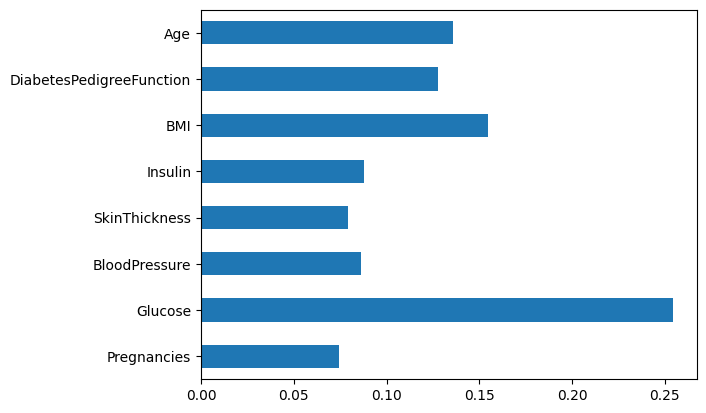

In [38]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))


In [39]:
import pickle


In [50]:
saved_model = pickle.dumps(svc_model)
svc_from_pickle = pickle.loads(saved_model)
svc_from_pickle.predict(X_test)


array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [51]:
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
diabetes_df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [54]:
#collects data on person
def data_input():
    preg = int(input("Number of pregnancies: "))
    gluc = int(input("Glucose Level: "))
    bp = int(input("BP Level: "))
    sthick = int(input("Skin Thickness: "))
    insulin = int(input("Insulin Level: "))
    bmi = float(input("BMI: "))
    dpf = float(input("Diabetes Pedigree Function: "))
    age = int(input("Age: "))

    array = [preg, gluc, bp, sthick, insulin, bmi, dpf, age]
    return array

In [57]:
unknown = [6,148,72,35,0,33.6,0.627,50]
final = np.asarray(unknown)
final_and_reshaped = final.reshape(1,-1)
standardised = sc_X .transform(final_and_reshaped)

#predicting the model
prediction = svc_model.predict(standardised)

if (prediction[0] == 1):
  print("Diabetic")
else:
  print("Not Diabetic")

Diabetic


In [59]:
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(svc_model, file)

In [60]:
import joblib

# Assuming you have previously fit the scaler with training data
# Replace YourTrainingData with the actual training data



# Save the scaler to a .pkl file
joblib.dump(sc_X, 'scaler.pkl')

['scaler.pkl']

SyntaxError: invalid syntax (2830201818.py, line 1)